##Plotting first Houston Run Output

Right now I am just trying to figure out how to look at some basic outputs. The basic steps are:
* figure out how to read a wrfout file in python
* figure out how to pull out temperature and humidity data
* figure out how to plot the temperature/humidity data on a map
* turn it into an animation to look at change over time

A lot of the example codes include geocat.datafiles but with my own netcdf I think I should be able to avoid that

Going to try to draw on this: https://geocat-examples.readthedocs.io/en/latest/gallery/Animations/NCL_animate_1.html#sphx-glr-gallery-animations-ncl-animate-1-py

In [1]:
import cartopy.crs as ccrs
import matplotlib.animation as animation
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

import geocat.viz as gv

C:\Users\rpkamakura\AppData\Local\anaconda3\envs\geocat\Lib\site-packages\pyproj\network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


Read in data:

In [6]:
test_ds16 = xr.open_dataset("./Houston/wrfpost_2016_d02_test.nc")
#ds16 = xr.open_dataset("../Houston_MarineHeatWave_2016/Combined/wrfout_MarineHeatWave.d02.2016-Combined.nc")
#ds17 = xr.open_dataset("../Houston_MarineHeatWave_2017/Combined/wrfout_MarineHeatWave.d02.2017-Combined.nc")

print(test_ds16.attrs)
test_ds16

#min_lat = ds.lat.min()
#max_lat = ds.lat.max()
#min_lon = ds.lon.min()
#max_lon = ds.lon.max()

#print([min_lon, max_lon, min_lat, max_lat])

{'title': 'wrfpost_2016_d02_test.nc', 'Conventions': 'CF 1.6, Standard Name Table v19', 'source': '../../Houston_MarineHeatWave_2016/wrfout_MarineHeatWave.d01.2016-03-23_00_00_00', 'notes': 'Created with NCL script:  wrfout_to_cf.ncl v2.0.3', 'created_by': 'Mark Seefeldt - mark.seefeldt@colorado.edu', 'institution': 'University of Colorado at Boulder - CIRES', 'creation_date': 'Fri Dec 13 15:45:18 CST 2024'}


<xarray.Dataset> Size: 342MB
Dimensions:    (time: 6, pressure: 5, eta: 44, ncl3: 1, south_north: 150,
                west_east: 328)
Coordinates:
  * time       (time) datetime64[ns] 48B 2016-03-23 ... 2016-03-23T05:00:00
  * pressure   (pressure) float32 20B 1e+03 850.0 700.0 500.0 300.0
  * eta        (eta) float32 176B 0.9973 0.9911 0.9832 ... 0.01515 0.0087 0.0028
    lat        (south_north, west_east) float32 197kB ...
    lon        (south_north, west_east) float32 197kB ...
Dimensions without coordinates: ncl3, south_north, west_east
Data variables: (12/58)
    DateTime   (time) float32 24B ...
    year       (time) int32 24B ...
    month      (time) int32 24B ...
    day        (time) int32 24B ...
    hour       (time) int32 24B ...
    minute     (time) int32 24B ...
    ...         ...
    LWP_high   (time, south_north, west_east) float32 1MB ...
    IWP_high   (time, south_north, west_east) float32 1MB ...
    PW_high    (time, south_north, west_east) float32 1MB ...
    LandMask   (time, south_north, west_east) float32 1MB ...
    LandUse    (time, south_north, west_east) float32 1MB ...
    SeaIce     (time, south_north, west_east) float32 1MB ...
Attributes:
    title:          wrfpost_2016_d02_test.nc
    Conventions:    CF 1.6, Standard Name Table v19
    source:         ../../Houston_MarineHeatWave_2016/wrfout_MarineHeatWave.d...
    notes:          Created with NCL script:  wrfout_to_cf.ncl v2.0.3
    created_by:     Mark Seefeldt - mark.seefeldt@colorado.edu
    institution:    University of Colorado at Boulder - CIRES
    creation_date:  Fri Dec 13 15:45:18 CST 2024

Create a quick vizualization to make sure it read in the file correctly

<xarray.DataArray 'T_2m' (time: 24, south_north: 333, west_east: 351)> Size: 11MB
[2805192 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 192B 2021-10-25T06:00:00 ... 2021-10-26T05...
    lat      (south_north, west_east) float32 468kB 28.27 28.27 ... 31.26 31.26
    lon      (south_north, west_east) float32 468kB -97.25 -97.24 ... -93.61
Dimensions without coordinates: south_north, west_east
Attributes:
    long_name:      Temperature at 2 m
    standard_name:  air_temperature
    units:          degC

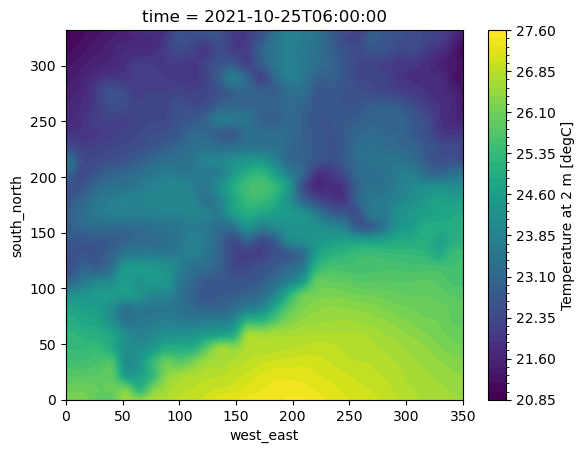

In [44]:
temp_basic = ds.T_2m

fig = plt.figure()
temp_basic[0,:,:].plot.contourf(levels=60)

temp_basic #for some reason when it plots, it doesn't use the right coordinates (the lat and lon)

Create simple starting plot

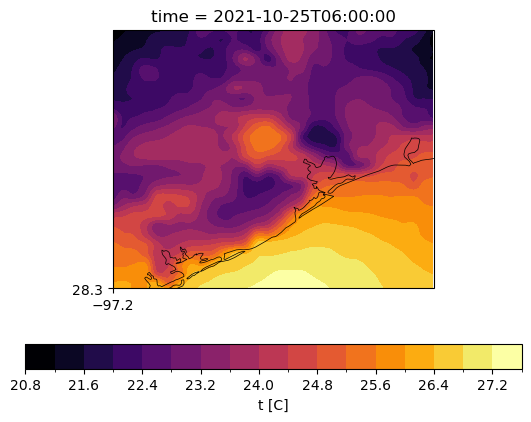

In [47]:
fig = plt.figure()

# explicitly set up axis with projection
ax = plt.axes(projection=ccrs.PlateCarree())

# add coastlines
ax.coastlines(linewidths=0.5)
ax.set_extent([maplimits[0], maplimits[1],maplimits[2],maplimits[3]], ccrs.PlateCarree())

temp_basic[0, :, :].plot.contourf(ax=ax,
                           transform=ccrs.PlateCarree(),
                           levels=20,
                           x = "lon", 
                           y="lat",
                           cmap="inferno",
                           cbar_kwargs={
                               "orientation": "horizontal",
                               "label": "t [C]"}
                            )

# configure axes
maplimits = [-97.2, -93.6, 28.3, 31.2]
ax.set_xlabel("")
ax.set_xticks(np.arange(maplimits[0], maplimits[1], 10))

ax.set_ylabel("")
ax.set_yticks(np.arange(maplimits[2], maplimits[3], 10));

Create animation

IndexError: range object index out of range

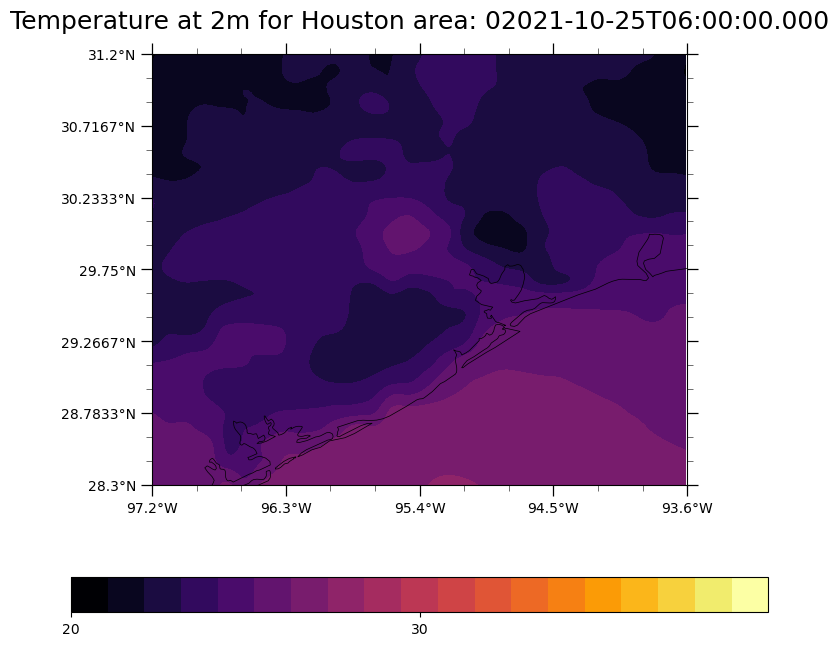

In [80]:
fig = plt.figure(figsize=(10, 8))

maplimits = [-97.2, -93.6, 28.3, 31.2]

# Generate axes using Cartopy and draw coastlines
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude= 0))
ax.coastlines(linewidths=0.5)

ax.set_extent([maplimits[0], maplimits[1],maplimits[2],maplimits[3]], ccrs.PlateCarree())

# Use geocat-viz convenience function to set axes limits & tick values
gv.set_axes_limits_and_ticks(ax,
                             xlim=(maplimits[0], maplimits[1]),
                             ylim=(maplimits[2], maplimits[3]),
                             xticks=np.linspace(maplimits[0], maplimits[1], 5),
                             yticks=np.linspace(maplimits[2], maplimits[3], 7))

# Use geocat-viz convenience function to add minor and major tick lines
gv.add_major_minor_ticks(ax, labelsize=10)

# Use geocat-viz convenience function to make latitude, longitude tick labels
gv.add_lat_lon_ticklabels(ax)

# Create initial plot
cplot = temp_basic[0, :, :].plot.contourf(ax=ax,
                                   transform=ccrs.PlateCarree(),
                                   vmin=20,
                                   vmax=40,
                                   x = "lon", 
                                   y="lat",
                                   levels=20,
                                   cmap="inferno",
                                   add_colorbar=False)

# Create a colorbar
cbar = fig.colorbar(cplot,
                    extendrect=True,
                    orientation="horizontal",
                    ticks=np.arange(20, 40, 10),
                    label="",
                    shrink=0.90)

# Remove minor ticks from colorbar that don't work well with other formatting
cbar.ax.minorticks_off()


# Animate function for matplotlib FuncAnimation
def animate(i):
    temp_basic[i, :, :].plot.contourf(ax=ax,
                               transform=ccrs.PlateCarree(),
                               vmin=20,
                               vmax=40,
                               x = "lon", 
                               y="lat",
                               levels=20,
                               cmap="inferno",
                               add_colorbar=False)

    gv.set_titles_and_labels(
        ax,
        maintitle=("Temperature at 2m for Houston area: " + str(i)) +
        str(temp_basic.coords['time'].values[i])[:23],
        xlabel="",
        ylabel="")

# Run the animation initiated with the frame from init and progressed with the animate function
anim = animation.FuncAnimation(fig, animate, frames=30, interval=200)

# Uncomment this line to save the animation
anim.save('animate_T_2m.gif', writer='pillow', fps=3)

Now do the same thing but with general temperature

In [76]:
temp_general = ds.T_p
#temp_general
#temp_gen_850 = temp_general[:, 1, :, :]
#temp_gen_850

<xarray.DataArray 'T_p' (time: 24, south_north: 333, west_east: 351)> Size: 11MB
[2805192 values with dtype=float32]
Coordinates:
  * time      (time) datetime64[ns] 192B 2021-10-25T06:00:00 ... 2021-10-26T0...
    pressure  float32 4B 850.0
    lat       (south_north, west_east) float32 468kB ...
    lon       (south_north, west_east) float32 468kB ...
Dimensions without coordinates: south_north, west_east
Attributes:
    long_name:      Temperature
    standard_name:  air_temperature
    units:          K

IndexError: range object index out of range

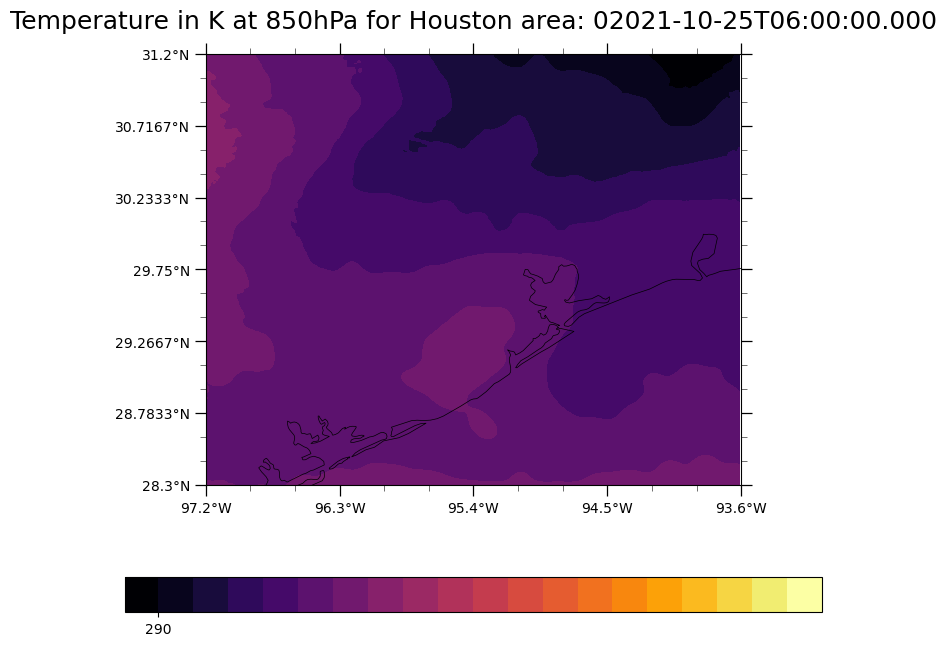

In [81]:
fig = plt.figure(figsize=(10, 8))

maplimits = [-97.2, -93.6, 28.3, 31.2]

# Generate axes using Cartopy and draw coastlines
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude= 0))
ax.coastlines(linewidths=0.5)

ax.set_extent([maplimits[0], maplimits[1],maplimits[2],maplimits[3]], ccrs.PlateCarree())

# Use geocat-viz convenience function to set axes limits & tick values
gv.set_axes_limits_and_ticks(ax,
                             xlim=(maplimits[0], maplimits[1]),
                             ylim=(maplimits[2], maplimits[3]),
                             xticks=np.linspace(maplimits[0], maplimits[1], 5),
                             yticks=np.linspace(maplimits[2], maplimits[3], 7))

# Use geocat-viz convenience function to add minor and major tick lines
gv.add_major_minor_ticks(ax, labelsize=10)

# Use geocat-viz convenience function to make latitude, longitude tick labels
gv.add_lat_lon_ticklabels(ax)

# Create initial plot
cplot = temp_general[0, 1, :, :].plot.contourf(ax=ax,
                                   transform=ccrs.PlateCarree(),
                                   vmin=290,
                                   vmax=300,
                                   x = "lon", 
                                   y="lat",
                                   levels=20,
                                   cmap="inferno",
                                   add_colorbar=False)

# Create a colorbar
cbar = fig.colorbar(cplot,
                    extendrect=True,
                    orientation="horizontal",
                    ticks=np.arange(290, 300, 10),
                    label="",
                    shrink=0.90)

# Remove minor ticks from colorbar that don't work well with other formatting
cbar.ax.minorticks_off()


# Animate function for matplotlib FuncAnimation
def animate(i):
    temp_general[i, 1, :, :].plot.contourf(ax=ax,
                               transform=ccrs.PlateCarree(),
                               vmin=290,
                               vmax=300,
                               x = "lon", 
                               y="lat",
                               levels=20,
                               cmap="inferno",
                               add_colorbar=False)

    gv.set_titles_and_labels(
        ax,
        maintitle=("Temperature in K at 850hPa for Houston area: " + str(i)) +
        str(temp_basic.coords['time'].values[i])[:23],
        xlabel="",
        ylabel="")

# Run the animation initiated with the frame from init and progressed with the animate function
anim = animation.FuncAnimation(fig, animate, frames=30, interval=200)

# Uncomment this line to save the animation
anim.save('animate_T_850hPa.gif', writer='pillow', fps=3)

Try plotting land use?

In [82]:
lu_data = ds.LandUse
lu_data

<xarray.DataArray 'LandUse' (time: 24, south_north: 333, west_east: 351)> Size: 11MB
[2805192 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 192B 2021-10-25T06:00:00 ... 2021-10-26T05...
    lat      (south_north, west_east) float32 468kB ...
    lon      (south_north, west_east) float32 468kB ...
Dimensions without coordinates: south_north, west_east
Attributes:
    long_name:      Land Use Category
    standard_name:  area_type
    units:          
    notes:          see WRF LANDUSE.TBL for category types

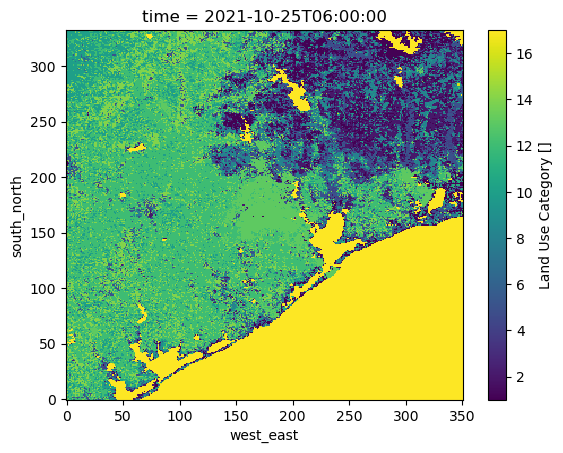

In [83]:
fig = plt.figure()
lu_data[0,:,:].plot.imshow()

Try to modify it a bit so it makes more sense - MODIFIED_IGBP_MODIS_NOAH

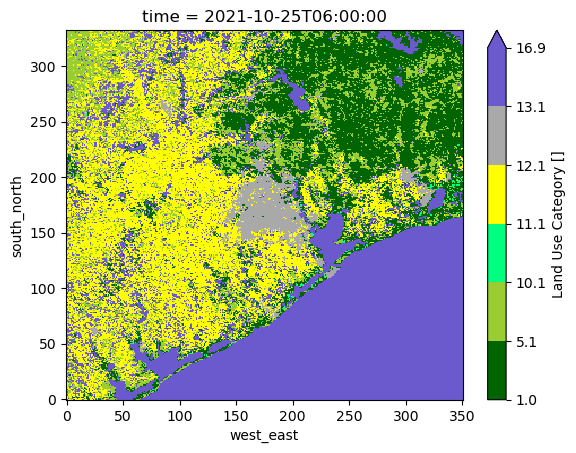

In [88]:
from matplotlib import colors

LU_nums = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
LU_names = ['Evergreen Needleleaf Forest', 'Evergreen Broadleaf Forest', 
            'Deciduous Needleleaf Forest', 'Deciduous Broadleaf Forest',
            'Mixed Forests', 'Closed Shrublands',  'Open Shrublands', 
            'Woody Savannas', 'Savannas', 'Grasslands', 
            'Permanent wetlands', 'Croplands', 'Urban and Built-Up', 
            'cropland/natural vegetation mosaic', 
            'Snow and Ice', 'Barren or Sparsely Vegetated', 'Water']

cmap = colors.ListedColormap(['darkgreen', 'yellowgreen', 'springgreen', 
                              'yellow', 'darkgray', 'tan', 'slateblue'])
bounds=[1,5.1, 10.1, 11.1,12.1, 13.1, 16.9]
norm = colors.BoundaryNorm(bounds, cmap.N)

# tell imshow about color map so that only set colors are used
img = lu_data[0,:,:].plot.imshow(interpolation='nearest', origin='lower',
                    cmap=cmap, norm=norm)

plt.savefig('LandUse.png')